# 01.Import Libraries

In [38]:
# importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. import data

In [5]:
#Setting file path
path = r'/Users/mohammedRusso/Documents/DATA_ANALYST_COURSE/DATA_Immersion_Submissions/Assingment 4/01-2025 Instacart Basket Analysis'

In [7]:
# Imporitng data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'prepared Data', 'orders_products_merged.pkl'))

# 03. Data Deriving

In [10]:
# define function
def add_num(x,y):
    sum = x + y
    return sum

In [12]:
# run function
add_num(9, 11)

20

In [14]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,4.4,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both


In [16]:
ords_prods_merge = ords_prods_merge.sort_values('product_name')

In [17]:
ords_prods_merge.shape

(32404859, 14)

In [20]:
df = ords_prods_merge[:1000000]

# 04. User defined If Statement

In [23]:
def price_label(row):

    if row['prices'] <=5:
        return 'Low-range product'
    elif (row['prices'] >5) and (row['prices'] <=15):
        return 'Mid-range product'
    elif row['prices'] > 15:
        return 'High range'
    else: return 'Not enough data'

In [25]:
df['price_range'] = df.apply(price_label, axis=1)

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_24961/2848743372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [22]:
df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    662644
Low-range product    301666
High range            35690
Name: count, dtype: int64

In [24]:
df.shape

(1000000, 15)

In [26]:
df['prices'].max()

99999.0

In [28]:
df = ords_prods_merge[:10000000]

In [30]:
df.shape

(10000000, 14)

In [32]:
df['price_range'] = df.apply(price_label, axis=1)

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_72038/2848743372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_label, axis=1)


In [34]:
df['price_range'].value_counts(dropna = False)

price_range
Mid-range product    7004354
Low-range product    2788919
High range            206727
Name: count, dtype: int64

In [36]:
df.shape

(10000000, 15)

# 05. If-Statements with the loc() Function

In [39]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

/var/folders/d6/b55202qs51369fgxv1dvzry80000gn/T/ipykernel_72038/1169838859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [41]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [43]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [45]:
df['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     7004354
Low-range product     2788919
High-range product     206727
Name: count, dtype: int64

In [47]:
ords_prods_merge.shape

(32404859, 14)

In [49]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [50]:
ords_prods_merge.loc[(ords_prods_merge['prices'] <= 15) & (ords_prods_merge['prices'] >5), 'price_range_loc'] = 'Mid-range product'

In [51]:
ords_prods_merge.loc[ords_prods_merge['prices'] <=5, 'price_range_loc'] = 'Low-range product'

In [55]:
ords_prods_merge['price_range_loc'].value_counts(dropna = False)

price_range_loc
Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: count, dtype: int64

# 06. If-Statements with For-Loops

In [58]:
for x in range(30,45):
    print("My age is %d" % (x))

My age is 30
My age is 31
My age is 32
My age is 33
My age is 34
My age is 35
My age is 36
My age is 37
My age is 38
My age is 39
My age is 40
My age is 41
My age is 42
My age is 43
My age is 44


In [60]:
#which day most orders take place
ords_prods_merge['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [62]:
# for loop to check how many rows have busiest days, least busy days and regular days
result = []

for value in ords_prods_merge["orders_day_of_week"]:
    if value == 0:
        result.append("Busiest day")
    elif value == 4:
        result.append("least busy")
    else:
        result.append("Regular busy")

In [63]:
ords_prods_merge['busiest_day'] = result

In [64]:
ords_prods_merge['busiest_day'].value_counts(dropna = False)

busiest_day
Regular busy    22416875
Busiest day      6204182
least busy       3783802
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x13f4bbc80>,
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

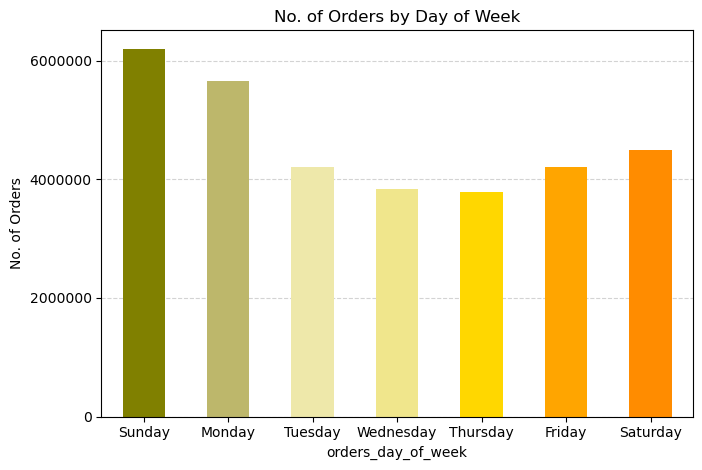

In [70]:
colors = ['olive','darkkhaki','palegoldenrod','khaki','gold','orange','darkorange','peru','sienna','saddlebrown']

# Create a bar chart showing busiest days of the week
order_day_bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color=colors)

# Set up grid line
plt.gca().set_axisbelow(True)
plt.grid(axis='y', color='lightgray', linestyle='dashed')


# Formatting
plt.title('No. of Orders by Day of Week')
plt.xticks(rotation=0,fontsize=10)
plt.tight_layout()
plt.ylabel('No. of Orders')
plt.yticks(np.arange(0,8000000,2000000),
           [int(value) if np.floor(value)==value else value for value in np.arange(0,8000000,2000000)])
plt.xticks([0,1,2,3,4,5,6],['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday'], rotation=0)

# 4.7 Task

In [69]:
# Question 2

#which day most orders take place
ords_prods_merge['orders_day_of_week'].value_counts(dropna = False)

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [71]:
# Function to check 2 busiest days of the week
ords_prods_merge.loc[ords_prods_merge['orders_day_of_week'].isin([0,1]), 'busiest_days'] = 'Two busiest Days'

In [72]:
ords_prods_merge.loc[ords_prods_merge['orders_day_of_week'].isin([3,4]), 'busiest_days'] = 'Two slowest Days'

In [73]:
ords_prods_merge.loc[ords_prods_merge['orders_day_of_week'].isin([6,2,5]), 'busiest_days'] = 'Regular Days'

In [77]:
# Question 3
ords_prods_merge['busiest_days'].value_counts(dropna = False)

busiest_days
Regular Days        12916111
Two busiest Days    11864412
Two slowest Days     7624336
Name: count, dtype: int64

In [79]:
# Question 4
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,match,price_range_loc,busiest_day,busiest_days
30885513,1888640,196356,14,2,0,12.0,25773,23,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Regular busy,Regular Days
10811325,2754998,68576,6,0,8,7.0,25773,16,1,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Busiest day,Two busiest Days
26539914,3086607,168921,27,2,20,0.0,25773,2,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Regular busy,Regular Days
13922765,429310,88247,2,4,10,8.0,25773,12,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,least busy,Two slowest Days
2470107,1836950,15906,2,3,14,12.0,25773,7,0,#2 Coffee Filters,26,7,11.0,both,Mid-range product,Regular busy,Two slowest Days


In [81]:
# Checking value counts on order_hour_of_day column
ords_prods_merge['order_hour_of_day'].value_counts(dropna = False)

order_hour_of_day
10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: count, dtype: int64

In [83]:
#Create a for loop statement labeling time periods as Most orders, fewset orders, average orders
result_3 = []
for x in ords_prods_merge["order_hour_of_day"]:
    if x in[10, 11, 14, 15, 13, 12, 16, 9]:
        result_3.append("Most orders")
    elif x in[23, 6, 0, 1, 5, 2, 4, 3]:
        result_3.append("Fewest orders")
    else:
        result_3.append("Average orders")
    

In [ ]:
result_3

In [85]:
#Create new column 'busiest_perdiod_of_day'
ords_prods_merge['busiest_perdiod_of_day'] = result_3

In [86]:
# 5. Print frequency of "busiest_period_of_day" column
ords_prods_merge['busiest_perdiod_of_day'].value_counts(dropna = False)

busiest_perdiod_of_day
Most orders       21118071
Average orders     9997651
Fewest orders      1289137
Name: count, dtype: int64

In [89]:
#7 Exporting dataframe

ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_dervd.pkl'))

In [90]:
ords_prods_merge.shape

(32404859, 18)